In [1]:
import numpy as np
import cv2

import os

from PIL import Image
from PIL import UnidentifiedImageError

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, RandomBrightness, RandomContrast, Rescaling
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

2023-03-14 17:49:59.201616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 17:50:00.176843: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hika/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64::/home/hika/miniconda3/envs/tf/lib/
2023-03-14 17:50:00.176902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hika/miniconda

In [2]:
center = os.listdir('training/center')
up = os.listdir('training/up')
down = os.listdir('training/down')
left = os.listdir('training/left')
right = os.listdir('training/right')
closed = os.listdir('training/closed')

In [3]:
X = []
y = []

In [4]:
img_size = 24

In [5]:
for i in center:
    try:
        img = cv2.imread('training/center/' + i)
        img = cv2.resize(img, (img_size,img_size))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError:
        pass

In [6]:
for i in up:
    try:
        img = cv2.imread('training/up/' + i)
        img = cv2.resize(img, (img_size,img_size))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass

In [7]:
for i in down:
    try:
        img = cv2.imread('training/down/' + i)
        img = cv2.resize(img, (img_size,img_size))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass

In [8]:
for i in left:
    try:
        img = cv2.imread('training/left/' + i)
        img = cv2.resize(img, (img_size,img_size))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(np.asarray(img))
        y.append(3)
    except UnidentifiedImageError:
        pass

In [9]:
for i in right:
    try:
        img = cv2.imread('training/right/' + i)
        img = cv2.resize(img, (img_size,img_size))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(np.asarray(img))
        y.append(4)
    except UnidentifiedImageError:
        pass

In [10]:
for i in closed:
    try:
        img = cv2.imread('training/closed/' + i)
        img = cv2.resize(img, (img_size,img_size))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(np.asarray(img))
        y.append(5)
    except UnidentifiedImageError:
        pass

In [11]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(6242, 24, 24, 3) (6242,)


In [12]:
x = X.astype('float32')
x /= 255 

In [13]:
num_classes = 6

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0. 0. 0. 0. 0.]


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, labels, test_size = 0.3, random_state=123)
print('Train dataset number: {}'.format(len(x_train)))
print('Test dataset number: {}'.format(len(x_val)))

Train dataset number: 4369
Test dataset number: 1873


In [15]:
print(y_val)

[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [17]:
model = Sequential()
#model.add(RandomContrast(factor=0.2))
#model.add(RandomBrightness(factor=0.2))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (img_size, img_size, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)) )
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation = 'softmax'))

2023-03-14 17:50:03.773688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-14 17:50:03.799570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-14 17:50:03.799741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-14 17:50:03.800481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [18]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [19]:
epochs = 40

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]  

history = model.fit(
                    x_train, y_train,
                    batch_size=16,
                    epochs=epochs,
                    verbose=1,
                    callbacks = callbacks_list,
                    validation_data=(x_val, y_val))

Epoch 1/40


2023-03-14 17:50:05.607919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-14 17:50:07.035616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-14 17:50:07.047860: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fee30023930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-14 17:50:07.047872: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-03-14 17:50:07.063640: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-14 17:50:07.221210: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime 

270/274 [============================>.] - ETA: 0s - loss: 1.3982 - accuracy: 0.4532
Epoch 1: val_loss improved from inf to 0.96885, saving model to model.h5
274/274 [==============================] - 4s 2ms/step - loss: 1.3953 - accuracy: 0.4537 - val_loss: 0.9688 - val_accuracy: 0.6994
Epoch 2/40
254/274 [==========================>...] - ETA: 0s - loss: 0.9134 - accuracy: 0.6993
Epoch 2: val_loss improved from 0.96885 to 0.72726, saving model to model.h5
274/274 [==============================] - 1s 2ms/step - loss: 0.9087 - accuracy: 0.6999 - val_loss: 0.7273 - val_accuracy: 0.7672
Epoch 3/40
251/274 [==========================>...] - ETA: 0s - loss: 0.7655 - accuracy: 0.7495
Epoch 3: val_loss improved from 0.72726 to 0.62547, saving model to model.h5
274/274 [==============================] - 1s 2ms/step - loss: 0.7620 - accuracy: 0.7494 - val_loss: 0.6255 - val_accuracy: 0.7875
Epoch 4/40
267/274 [============================>.] - ETA: 0s - loss: 0.6596 - accuracy: 0.7781
Epoch 4

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0

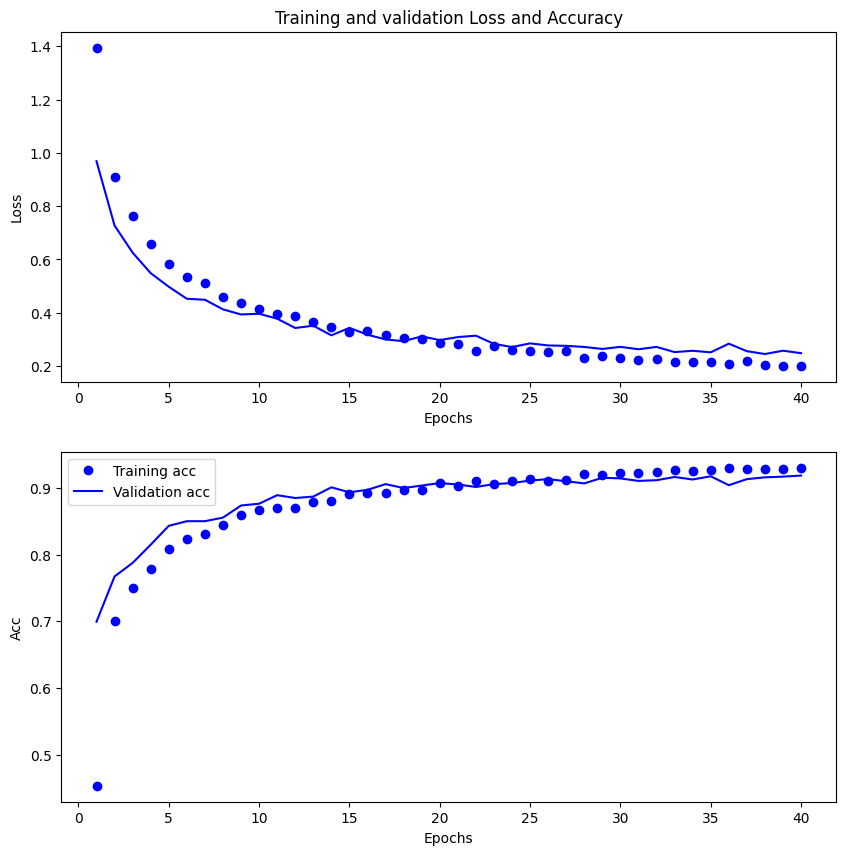

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.models import load_model
# Load the best saved model
model = load_model('model.h5')

In [23]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2450641244649887
Test accuracy: 0.9156433343887329


In [24]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


59/59 [==============================] - 0s 624us/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

      Center       0.86      0.87      0.87       414
          Up       0.96      0.92      0.94       249
        Down       0.89      0.89      0.89       281
        Left       0.91      0.92      0.91       308
       Right       0.90      0.92      0.91       297
      Closed       0.99      0.99      0.99       324

    accuracy                           0.92      1873
   macro avg       0.92      0.92      0.92      1873
weighted avg       0.92      0.92      0.92      1873



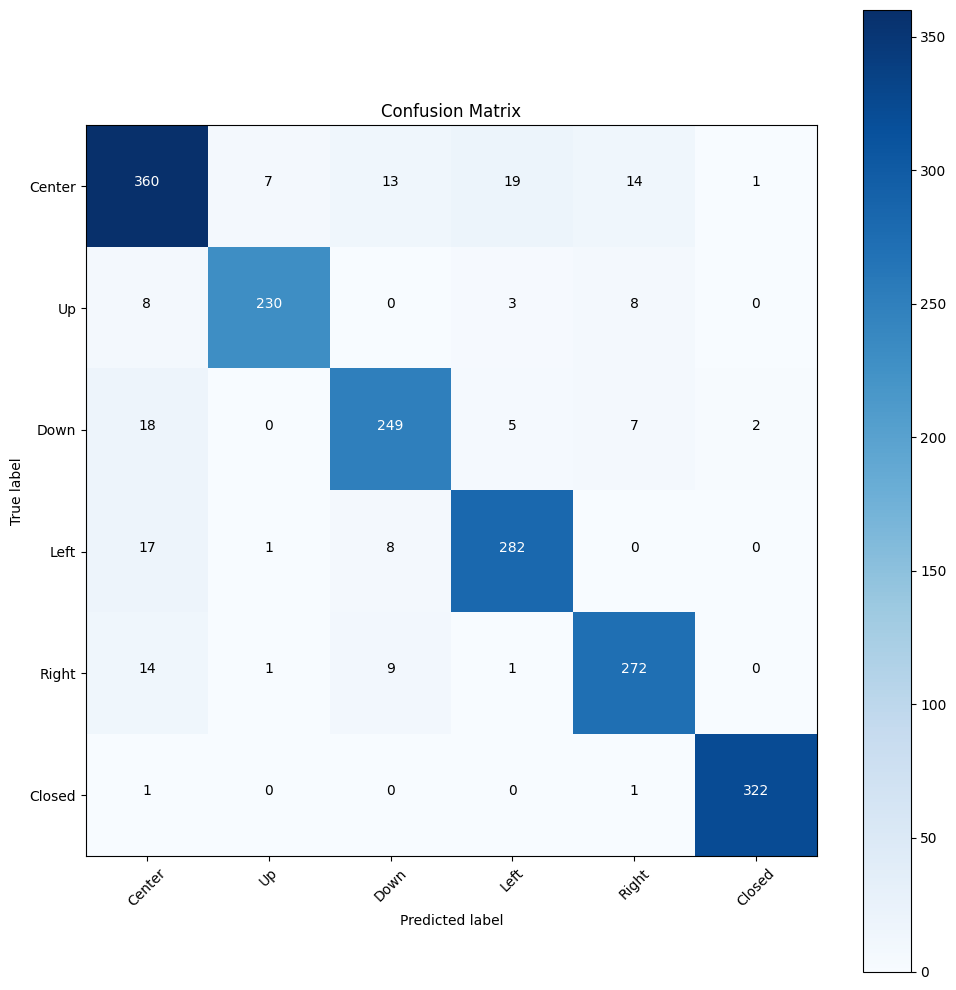

In [25]:
import numpy as np

y_pred = (model.predict(x_val) > 0.5).astype("int32")

y_test_c = np.argmax(y_val, axis=1)
target_names = ["Center", "Up", "Down", "Left", "Right", "Closed"]

Y_pred = np.argmax(model.predict(x_val),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))

In [26]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets
